In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

# CMUL
Y = [57896.0, 56599.0, 53995.0, 52793.0, 51047.0, 48582.0, 47270.0, 45285.0, 43507.0, 41936.0, 40474.0, 38644.0, 
                    36985.0, 35506.0, 33903.0, 32203.0, 30526.0, 29337.0, 28391.0, 27104.0, 25745.0, 24765.0, 23450.0, 22278.0, 
                    21580.0, 20615.0, 19777.0, 18892.0, 18192.0, 17468.0, 16507.0, 16004.0, 15516.0, 14849.0, 14401.0, 14229.0, 
                    13849.0, 13946.0, 14304.0, 14977.0, 17259.0, 20012.0, 25442.0, 33907.0, 43314.0, 48903.0, 45509.0, 34395.0, 
                    21777.0, 13409.0, 9238.0, 7356.0, 6559.0, 5897.0, 5510.0, 5173.0, 5087.0, 4850.0, 4766.0, 4727.0, 4662.0, 
                    4768.0, 4585.0, 4391.0, 4171.0, 3659.0, 3360.0, 3113.0, 3081.0, 2957.0, 2778.0, 2691.0, 2606.0, 2591.0, 
                    2495.0, 2383.0, 2380.0, 2199.0, 2155.0, 2089.0, 2020.0, 1974.0, 1905.0, 1796.0, 1798.0, 1716.0, 1631.0, 
                    1608.0, 1504.0, 1511.0, 1452.0, 1461.0, 1387.0, 1365.0, 1312.0, 1284.0, 1275.0, 1194.0, 1214.0, 1117.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 1650055.0

In [3]:
def funcVec(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def fitFunc(x,
            N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1,
            N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2,
            Nbg, a1, a2, a3):
    return funcVec(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1) + funcVec(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2) + DE(x, Nbg, a1, a2, a3)

In [7]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(vMass_OS))

condition = (x_data > 2.0)
#condition = True
x_filtered = np.ravel(x_data[condition])
y_filtered = np.ravel(y_data[condition])
y_error_filtered = np.ravel(y_error[condition])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

In [8]:
p0 = np.array([4.34346001e+04, 3.09447591e+00, 7.29521704e-02, 9.96696169e-01,
               3.04366213e+00, 1.82082157e+00, 2.55669142e+01, 7.14807206e+02,
               3.68534012e+00, 6.54321063e-02, 1.03781632e+00, 1.42893686e+02,
               1.09277059e+01, 1.63297285e+02, 2.22753488e+04, 3.34947479e+01,
               -5.98220438e-01, -1.56101540e+00])

In [9]:
popt, pcov, nfev, fvec, fjac = curve_fit(fitFunc, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0,  method = 'trf', full_output = True)

print("popt: \n", popt) 
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [ 4.34346001e+04  3.09632760e+00  6.95507089e-02  1.00119124e+00
  3.04424610e+00  1.82007607e+00  2.55669130e+01  7.14807206e+02
  3.68534250e+00  6.50579177e-02  1.03781446e+00  1.42893686e+02
  1.09277059e+01  1.63297285e+02  2.22753488e+04  3.34939411e+01
 -6.44269481e-01 -1.63043941e+00]
pcov: 
 [[ 1.91493623e+05  3.98026150e-02 -2.06904922e-01  1.02667062e+00
  -8.07662089e+01 -2.87597880e+01  4.29291544e+03  6.15565611e+03
  -1.81528645e-01  7.18795797e-01  3.79553777e+01 -2.76674801e+06
  -2.48662228e-09  9.47996866e-09  1.10656938e+06 -1.02954015e+03
  -7.55330713e+00 -1.29023193e+01]
 [ 3.98026150e-02  6.78078361e-07 -3.96154134e-07 -2.40034985e-05
   2.47359752e-04  1.06930096e-06 -4.22410757e-04 -5.00076899e-03
   2.58590062e-07 -5.30382434e-07 -5.52850629e-05  3.09995786e+00
   3.57863346e-15 -1.03200957e-14 -2.85160598e+00  3.29759833e-03
   2.14717208e-05  2.38496323e-05]
 [-2.06904922e-01 -3.96154134e-07  9.85706464e-07  3.11231868e-05
  -3.32408762e-04  1.26226

/tmp/ipykernel_5977/3209874668.py:2: RuntimeWarning: overflow encountered in scalar power
  AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
/tmp/ipykernel_5977/3209874668.py:9: RuntimeWarning: invalid value encountered in multiply
  [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])
/tmp/ipykernel_5977/3209874668.py:9: RuntimeWarning: overflow encountered in scalar multiply
  [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])


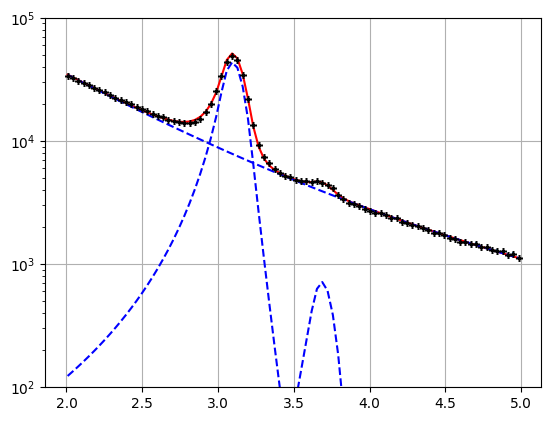

In [10]:
x_data_fit = np.linspace(min(x_data), max(x_data), len(x_data))
plt.errorbar(x_data, y_data, y_error, marker='+', mfc='black', mec='black', ms=2, mew=5, ls='')
plt.plot(x_data_fit, fitFunc(x_data_fit, *popt), '-r')
plt.plot(x_data_fit, funcVec(x_data_fit, *popt[:7]), '--b')
plt.plot(x_data_fit, funcVec(x_data_fit, *popt[7:14]), '--b')
plt.plot(x_data_fit, DE(x_data_fit, *popt[14:18]), '--b')
plt.yscale('log')
plt.ylim(100, 100000)
plt.grid(True)

In [11]:
print(quad(fitFunc, 2.7, 3.3, args = (*popt, )))

(14155.189981037975, 0.00012893521096531135)


In [22]:
print(quad(funcVec, 0, np.inf, args = (*popt[:7], )))

(9154.236599674789, 6.53521524740879e-05)


In [23]:
signal = quad(funcVec, 0, np.inf, args = (*popt[:7], ))[0]
bruit = quad(funcVec, 0, np.inf, args = (*popt[7:14], ))[0] + quad(DE, 0, np.inf, args = (*popt[14:18], ))[0]
print("Signal :", signal)
print("Bruit :", bruit)

Signal : 9154.236599674789
Bruit : 492300.1293069265


In [24]:
print("RSB :", signal / np.sqrt(signal + bruit))

RSB : 12.927258240673819
